<a href="https://colab.research.google.com/github/swapnilmn/Assignment_1-CS6910/blob/master/Assignment_1_Question8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 8 (5 Marks) In all the models above you would have used cross entropy loss. Now compare the cross entropy loss with the squared error loss. I would again like to see some automatically generated plots or your own plots to convince me whether one is better than the other.

In [2]:
!wget -O Question_3_.ipynb https://raw.githubusercontent.com/swapnilmn/Assignment_1-CS6910/master/Question_3_.ipynb?token=GHSAT0AAAAAAB7DKQRIZNU7PQPSO4CTFQDSZAIDBBA
!pip install import_ipynb
import import_ipynb
import Question_3_ as NN
from Question_3_  import FFNN

--2023-03-08 05:12:40--  https://raw.githubusercontent.com/swapnilmn/Assignment_1-CS6910/master/Question_3_.ipynb?token=GHSAT0AAAAAAB7DKQRIZNU7PQPSO4CTFQDSZAIDBBA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41506 (41K) [text/plain]
Saving to: ‘Question_3_.ipynb’

Question_3_.ipynb   100%[===================>]  40.53K  --.-KB/s    in 0.01s   

2023-03-08 05:12:40 (3.60 MB/s) - ‘Question_3_.ipynb’ saved [41506/41506]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from Question_3_.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


wandb: Currently logged in as: ed22s009. Use `wandb login --relogin` to force relogin


(54000, 10) (6000, 10) (10000, 10)
(54000, 784) (6000, 784) (10000, 784)


# Libraries 

In [3]:
!pip install wandb
import wandb
wandb.login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

# Train Function

  0%|          | 0/2 [00:00<?, ?epoch/s]

[[839   2   5  37   6   1  97   0  13   0]
 [  5 942  13  30   5   0   4   0   1   0]
 [ 14   0 616   6 181   1 178   0   4   0]
 [ 37   9   1 871  34   1  41   0   6   0]
 [  0   1  64  43 724   0 163   0   5   0]
 [  1   0   0   1   0 897   0  53   5  43]
 [193   2  86  26  81   0 586   0  26   0]
 [  0   0   0   0   0  39   0 916   0  45]
 [  0   1   3   5   6   7  21   4 953   0]
 [  0   0   0   0   0  10   1  46   0 943]]


accuracy,▁█
epoch,▁█
loss,█▁
val_accuracy,▁█
val_loss,█▁
accuracy,0.84293
epoch,2
loss,0.08072
val_accuracy,0.8355
val_loss,0.0808


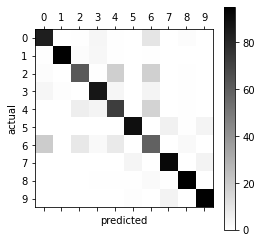

In [6]:
wandb.init(project = 'Question_8')

algos = ['GD','SGD', 'MiniBatch', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'Adam','Nadam']
configuration = {
    'learning_rate': 0.001,
    'epochs': 2,
    'hidden_layer_count': 3,
    'size_hidden_layers': 64,
    'optimizer': 'nadam',
    'batch_size': 64,
    'activation': 'tanh',
    'weight_initializations': 'random',
    'weight_decay': 0.05,
    'loss_function': 'MSE',
}

def train():
  
  wandb.init(project ='confusion_matrix',config=configuration, magic=True,reinit = True)
  wandb.run.name = '/Loss/'+str(wandb.config.loss_function)
  
  # [configuration['size_hidden_layers']] * configuration['hidden_layer_count']
  hidden_layer_count = wandb.config.hidden_layer_count 
  size_hidden_layers = wandb.config.size_hidden_layers 
  model = FFNN(NN.X_train, NN.Y_train,
                epochs = wandb.config.epochs, 
                hidden_layer_count =  wandb.config.hidden_layer_count,
                hidden_layers = [size_hidden_layers]*hidden_layer_count,
                learning_rate = wandb.config.learning_rate,
                batch_size = wandb.config.batch_size,
                activation=wandb.config.activation,
                weight_init=wandb.config.weight_initializations,
                loss = wandb.config.loss_function,
                weight_decay = wandb.config.weight_decay)

  algos = ['GD','SGD', 'MiniBatch', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'Adam','Nadam']
  ['momentum','sgd','rmsprop','nesterov','adam','nadam']
  optimizer = wandb.config.optimizer
  if optimizer == 'SGD':
    weights = model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'SGD')
  elif optimizer == 'Momentum':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'Momentum')
  elif optimizer == 'NAG':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'NAG')
  elif optimizer == 'RMSProp':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'RMSProp')
  elif optimizer == 'Adam':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo='Adam')
  elif optimizer =='nadam':
    weights =model.fit(NN.X_train, NN.Y_train, NN.X_val, NN.Y_val, algo= 'Nadam')
  else:
    print('Invalid optimizer')

  confusion_matrix = model.confusion_matrix(NN.X_test, NN.Y_test)
  print(confusion_matrix)
  model.confusion_matrix_plot(confusion_matrix)

if __name__ == '__main__':
  train()
  wandb.finish()

In [ ]:
try:
    import wandb
    wandb_available = True
except ImportError:
    wandb_available = False

if wandb_available:
    sweep_config = {
        'method': 'bayes',
        'name': 'Assignement1',
        'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
        'parameters': {
          'epochs': {'values': [5]},#150
          'hidden_layer_count':{'values': [3]},
          'size_hidden_layers':{'values': [64]},
          'learning_rate':{'values': [0.001]},
          'optimizer':{'values': [ 'nadam']},
          'batch_size':{'values': [64]},
          'activation':{'values': ['tanh']},
          'weight_initializations':{'values': ['random']},
          'weight_decay':{'values': [0.05 ]},
          'loss_function':{'values': ['MSE', 'CE']}
        }}
     

    # Create the sweep and run the training function
    sweep_id = wandb.sweep(sweep_config, project='Question_8_Best_Model')
    wandb.agent(sweep_id, function=train)
else:
    print('wandb library not available')


Create sweep with ID: 2rxd9ha5
Sweep URL: https://wandb.ai/ed22s009/Question_8_Best_Model/sweeps/2rxd9ha5


wandb: Agent Starting Run: k904yj6z with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: MSE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.08014324635309127, Train Accuracy: 0.882537037037037, Val Loss: 0.08030239531089263, Val Accuracy: 0.8693333333333333
Model trained successfully !
[[834   1  11  31   7   1 103   0  12   0]
 [  5 958   5  23   5   0   3   0   1   0]
 [ 12   0 741   9 110   0 124   0   4   0]
 [ 29   6   6 889  29   1  37   0   3   0]
 [  0   1  93  43 756   0 102   0   5   0]
 [  2   0   0   1   0 935   0  36   2  24]
 [144   1  69  36  70   0 660   0  20   0]
 [  0   0   0   0   0  32   0 925   0  43]
 [  0   1   2   3   9   3  11   4 967   0]
 [  0   0   0   0   0   4   1  37   0 958]]


accuracy,▁▇▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▇███
val_loss,█▃▂▁▁
accuracy,0.88254
epoch,5
loss,0.08014
val_accuracy,0.86933
val_loss,0.0803


wandb: Agent Starting Run: ofgzs1z7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: CE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.18914938538657158, Train Accuracy: 0.8852407407407408, Val Loss: 0.18972887911193512, Val Accuracy: 0.8745
Model trained successfully !
[[843   0   8  32   6   1 101   0   9   0]
 [  5 956   1  26   4   0   5   1   2   0]
 [ 14   1 731   9 128   1 113   0   3   0]
 [ 29  10   6 882  34   1  34   0   4   0]
 [  0   1  92  44 767   0  91   0   5   0]
 [  0   0   0   1   0 936   0  38   3  22]
 [132   3  73  29  76   0 675   0  12   0]
 [  0   0   0   0   0  25   0 939   0  36]
 [  0   1   8   4   7   3  11   4 962   0]
 [  0   0   0   0   0  11   1  37   0 951]]


accuracy,▁▅▇██
epoch,▁▃▅▆█
loss,█▄▂▁▁
val_accuracy,▁▆▇██
val_loss,█▃▂▁▁
accuracy,0.88524
epoch,5
loss,0.18915
val_accuracy,0.8745
val_loss,0.18973


wandb: Agent Starting Run: ju7qwtfz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: CE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.18914938538657158, Train Accuracy: 0.8852407407407408, Val Loss: 0.18972887911193512, Val Accuracy: 0.8745
Model trained successfully !
[[843   0   8  32   6   1 101   0   9   0]
 [  5 956   1  26   4   0   5   1   2   0]
 [ 14   1 731   9 128   1 113   0   3   0]
 [ 29  10   6 882  34   1  34   0   4   0]
 [  0   1  92  44 767   0  91   0   5   0]
 [  0   0   0   1   0 936   0  38   3  22]
 [132   3  73  29  76   0 675   0  12   0]
 [  0   0   0   0   0  25   0 939   0  36]
 [  0   1   8   4   7   3  11   4 962   0]
 [  0   0   0   0   0  11   1  37   0 951]]


accuracy,▁▅▇██
epoch,▁▃▅▆█
loss,█▄▂▁▁
val_accuracy,▁▆▇██
val_loss,█▃▂▁▁
accuracy,0.88524
epoch,5
loss,0.18915
val_accuracy,0.8745
val_loss,0.18973


wandb: Agent Starting Run: gto8su7x with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: CE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.18914938538657158, Train Accuracy: 0.8852407407407408, Val Loss: 0.18972887911193512, Val Accuracy: 0.8745
Model trained successfully !
[[843   0   8  32   6   1 101   0   9   0]
 [  5 956   1  26   4   0   5   1   2   0]
 [ 14   1 731   9 128   1 113   0   3   0]
 [ 29  10   6 882  34   1  34   0   4   0]
 [  0   1  92  44 767   0  91   0   5   0]
 [  0   0   0   1   0 936   0  38   3  22]
 [132   3  73  29  76   0 675   0  12   0]
 [  0   0   0   0   0  25   0 939   0  36]
 [  0   1   8   4   7   3  11   4 962   0]
 [  0   0   0   0   0  11   1  37   0 951]]


accuracy,▁▅▇██
epoch,▁▃▅▆█
loss,█▄▂▁▁
val_accuracy,▁▆▇██
val_loss,█▃▂▁▁
accuracy,0.88524
epoch,5
loss,0.18915
val_accuracy,0.8745
val_loss,0.18973


wandb: Agent Starting Run: h3vwhjr4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: CE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.18914938538657158, Train Accuracy: 0.8852407407407408, Val Loss: 0.18972887911193512, Val Accuracy: 0.8745
Model trained successfully !
[[843   0   8  32   6   1 101   0   9   0]
 [  5 956   1  26   4   0   5   1   2   0]
 [ 14   1 731   9 128   1 113   0   3   0]
 [ 29  10   6 882  34   1  34   0   4   0]
 [  0   1  92  44 767   0  91   0   5   0]
 [  0   0   0   1   0 936   0  38   3  22]
 [132   3  73  29  76   0 675   0  12   0]
 [  0   0   0   0   0  25   0 939   0  36]
 [  0   1   8   4   7   3  11   4 962   0]
 [  0   0   0   0   0  11   1  37   0 951]]


accuracy,▁▅▇██
epoch,▁▃▅▆█
loss,█▄▂▁▁
val_accuracy,▁▆▇██
val_loss,█▃▂▁▁
accuracy,0.88524
epoch,5
loss,0.18915
val_accuracy,0.8745
val_loss,0.18973


wandb: Agent Starting Run: i4p56qy2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: MSE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.08014324635309127, Train Accuracy: 0.882537037037037, Val Loss: 0.08030239531089263, Val Accuracy: 0.8693333333333333
Model trained successfully !
[[834   1  11  31   7   1 103   0  12   0]
 [  5 958   5  23   5   0   3   0   1   0]
 [ 12   0 741   9 110   0 124   0   4   0]
 [ 29   6   6 889  29   1  37   0   3   0]
 [  0   1  93  43 756   0 102   0   5   0]
 [  2   0   0   1   0 935   0  36   2  24]
 [144   1  69  36  70   0 660   0  20   0]
 [  0   0   0   0   0  32   0 925   0  43]
 [  0   1   2   3   9   3  11   4 967   0]
 [  0   0   0   0   0   4   1  37   0 958]]


accuracy,▁▇▇██
epoch,▁▃▅▆█
loss,█▃▂▁▁
val_accuracy,▁▇███
val_loss,█▃▂▁▁
accuracy,0.88254
epoch,5
loss,0.08014
val_accuracy,0.86933
val_loss,0.0803


wandb: Agent Starting Run: jtkre27q with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	loss_function: CE
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 64
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/5 [00:00<?, ?epoch/s]